In [1]:
import pandas as pd

# Load the dataset
file_path = "tested.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


(None,
    PassengerId  Survived  Pclass  \
 0          892         0       3   
 1          893         1       3   
 2          894         0       2   
 3          895         0       3   
 4          896         1       3   
 
                                            Name     Sex   Age  SibSp  Parch  \
 0                              Kelly, Mr. James    male  34.5      0      0   
 1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
 2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
 3                              Wirz, Mr. Albert    male  27.0      0      0   
 4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
 
     Ticket     Fare Cabin Embarked  
 0   330911   7.8292   NaN        Q  
 1   363272   7.0000   NaN        S  
 2   240276   9.6875   NaN        Q  
 3   315154   8.6625   NaN        S  
 4  3101298  12.2875   NaN        S  )

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Drop irrelevant columns
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Handle missing values
imputer_age = SimpleImputer(strategy="median")
df["Age"] = imputer_age.fit_transform(df[["Age"]])

imputer_fare = SimpleImputer(strategy="median")
df["Fare"] = imputer_fare.fit_transform(df[["Fare"]])

# Encode categorical variables
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])

# Normalize numerical features
scaler = StandardScaler()
df[["Age", "Fare", "SibSp", "Parch"]] = scaler.fit_transform(df[["Age", "Fare", "SibSp", "Parch"]])

# Splitting dataset into training and testing sets
X = df.drop(columns=["Survived"])
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display processed data sample
X_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
336,2,1,0.189203,-0.499470,-0.400248,-0.404719,2
31,2,1,-0.441286,1.733455,-0.400248,-0.073078,2
84,2,1,-0.204852,-0.499470,-0.400248,-0.445801,1
287,1,1,-0.441286,0.616992,-0.400248,0.836992,2
317,2,1,-0.835341,-0.499470,-0.400248,-0.449535,2


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


(1.0, 1.0, 1.0, 1.0)

In [7]:
# Check for data leakage by inspecting unique values in training and test sets
train_unique = set(y_train.unique())
test_unique = set(y_test.unique())

# Verify class distribution in train and test sets
train_distribution = y_train.value_counts(normalize=True)
test_distribution = y_test.value_counts(normalize=True)

train_unique, test_unique, train_distribution, test_distribution


({0, 1},
 {0, 1},
 Survived
 0    0.646707
 1    0.353293
 Name: proportion, dtype: float64,
 Survived
 0    0.595238
 1    0.404762
 Name: proportion, dtype: float64)

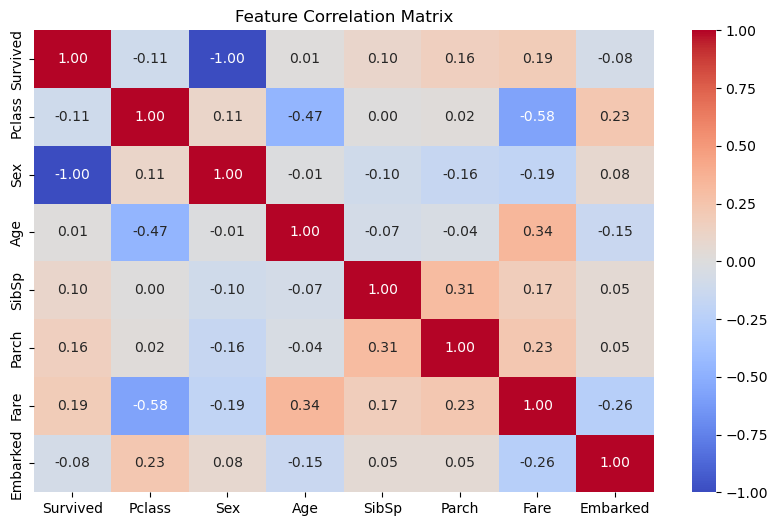

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

accuracy_rf, precision_rf, recall_rf, f1_rf


(1.0, 1.0, 1.0, 1.0)

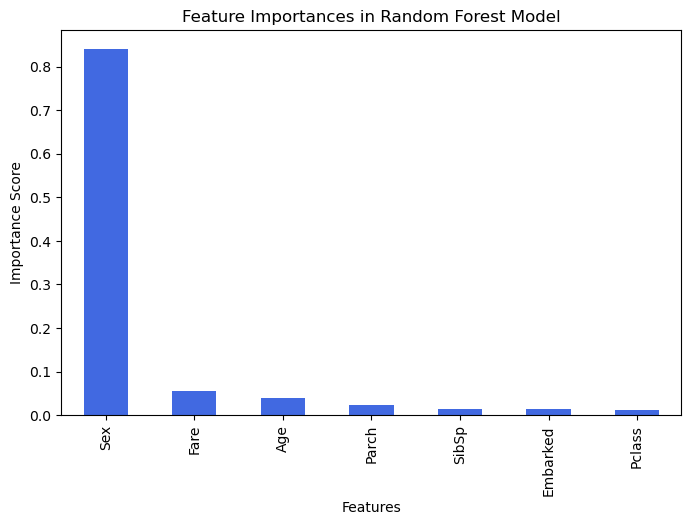

Sex         0.841308
Fare        0.055190
Age         0.039028
Parch       0.022875
SibSp       0.014954
Embarked    0.014586
Pclass      0.012058
dtype: float64

In [13]:
# Get feature importances from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort and plot
plt.figure(figsize=(8, 5))
feature_importances.sort_values(ascending=False).plot(kind="bar", color="royalblue")
plt.title("Feature Importances in Random Forest Model")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Display feature importance values
feature_importances.sort_values(ascending=False)


In [15]:
# Remove "Sex" from features
X_train_mod = X_train.drop(columns=["Sex"])
X_test_mod = X_test.drop(columns=["Sex"])

# Train a new Random Forest model
rf_model_mod = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_mod.fit(X_train_mod, y_train)

# Make predictions
y_pred_rf_mod = rf_model_mod.predict(X_test_mod)

# Evaluate performance
accuracy_rf_mod = accuracy_score(y_test, y_pred_rf_mod)
precision_rf_mod = precision_score(y_test, y_pred_rf_mod)
recall_rf_mod = recall_score(y_test, y_pred_rf_mod)
f1_rf_mod = f1_score(y_test, y_pred_rf_mod)

accuracy_rf_mod, precision_rf_mod, recall_rf_mod, f1_rf_mod


(0.6428571428571429,
 0.5909090909090909,
 0.38235294117647056,
 0.4642857142857143)

In [17]:
# Create a new feature: Survival likelihood based on Sex, Pclass, and Age
df["Sex_Pclass_Age"] = df["Sex"] * df["Pclass"] / (df["Age"] + 1)  # Adding 1 to avoid division by zero

# Re-split data
X = df.drop(columns=["Survived"])
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a new Random Forest model with engineered feature
rf_model_fe = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_fe.fit(X_train, y_train)

# Make predictions
y_pred_rf_fe = rf_model_fe.predict(X_test)

# Evaluate performance
accuracy_rf_fe = accuracy_score(y_test, y_pred_rf_fe)
precision_rf_fe = precision_score(y_test, y_pred_rf_fe)
recall_rf_fe = recall_score(y_test, y_pred_rf_fe)
f1_rf_fe = f1_score(y_test, y_pred_rf_fe)

accuracy_rf_fe, precision_rf_fe, recall_rf_fe, f1_rf_fe


(1.0, 1.0, 1.0, 1.0)

In [19]:
# Check direct correlation of features with "Survived"
df.corr()["Survived"].sort_values(ascending=False)


Survived          1.000000
Fare              0.192036
Parch             0.159120
SibSp             0.099943
Age               0.008035
Embarked         -0.076281
Pclass           -0.108615
Sex_Pclass_Age   -0.118201
Sex              -1.000000
Name: Survived, dtype: float64